# SKLEARN PRE-PROCESSING + PIPELINE

### 1) Definition : 
#### c est le pretraitement des donne , preparation des donne avnt les mettre a la machine 
#### comme : encodage , normalisaton , imputation , selection ,extraction 

# sklearn.preprocessing
### 2) le transformer

In [1]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
X= np.array(['chat',
            'chien',
            'chat',
            'oiseau'])

In [3]:
transformer = LabelEncoder()
transformer.fit(X)

LabelEncoder()

In [4]:
transformer.transform(X)

array([0, 1, 0, 2])

In [5]:
#pour une pier 2 coupe 
transformer.fit_transform(X)

array([0, 1, 0, 2])

# ---------------------------------------------------------------------------------------------------------------

### 3)Encodage 
#### 2 type dencodage : ordinal et one-hot

#### ordinal : encode chaque classe  de la variable y en une valeur numerique 
##### les transformeur :: labeloncoder() et ordinalencoder()


### LabelEncoder()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [7]:
y = np.array(['chat','chien','chat','oiseau'])

In [8]:
encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2])

In [9]:
#la methode inverse 
encoder.inverse_transform(np.array([0,0,2,2]))

C:\Users\user.user-PC\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['chat', 'chat', 'oiseau', 'oiseau'], dtype='|S6')

### OrdinalEncoder 

In [10]:
#from sklearn.preprocessing import OrdinalEncoder

In [11]:
X = np.array([['chat','Poils'],
             ['chien','Poils'],
             ['chat','Poils'],
             ['oiseau','Plumes']])

#### par contre le labelencoder ca  ne va pas marrcher pour la variable X c pour qon utiliser ordinalEncoder pour plusieur variable 

In [12]:
#encoder = OrdinalEncoder()
#encoder.fit_transform(X)
#_____________________________
#array([[0,1],
#       [1,0],
#        [0,1],
#        [2,0]])

#### problem --> 0<1 < 2 alor chat <chein <oiseau !!!   

#### donc on utilise :
### Encodage One Hote 

#### qui contien 3 transformer ---> LabelBinarizer(), MultilabelBinarizer() , OneHotEncoder()

### LabelBinarizer

In [13]:
from sklearn.preprocessing import LabelBinarizer

In [14]:
y = np.array(['chat','chien','chat','oiseau'])

In [15]:
encoder = LabelBinarizer(sparse_output=True) #sparse_output pour compresser la matrice
encoder.fit_transform(y)

<4x3 sparse matrix of type '<type 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

### One-Hot Encoder

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
X = np.array([['Chat','Poils'],
             ['Chien','Poils'],
             ['Chat','Poils'],
             ['Oiseau','Plumes']])

In [18]:
encoder = OneHotEncoder()

In [19]:
#encoder.fit_transform(X)

# ---------------------------------------------------------------------------------------------------------------

### 4)La Normalisation

#### MinMax

#### transform chaque varibale X de telle sort a etre compris entre 0 et  1 Xscaled = (X - Xmin) / (Xmax - Xmin) 

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
X = np.array([[70],
             [80],
             [120]])

In [22]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

C:\Users\user.user-PC\Anaconda2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0. ],
       [0.2],
       [1. ]])

In [23]:
X_test =np.array([[90]])
scaler.fit_transform(X_test)

array([[0.]])

In [24]:
from sklearn.datasets import load_iris

In [25]:
iris = load_iris()
X = iris.data

X_minmax = MinMaxScaler().fit_transform(X)

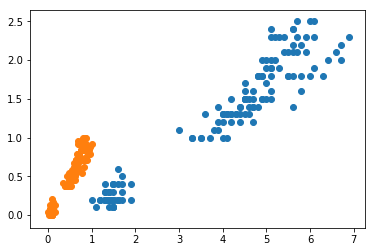

In [26]:
plt.scatter(X[:,2],X[:,3])
plt.scatter(X_minmax[:,2],X_minmax[:,3])
plt.show()

#### Standaritation

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
X = np.array([[70],
             [80],
             [120]])

In [29]:
#X_stdscl = StandardScaler().fit_transform(X)
#-0.92
#-0.46
#1.38

In [30]:
iris = load_iris()
X = iris.data

X_stdscl = StandardScaler().fit_transform(X)

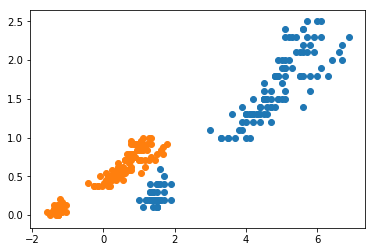

In [31]:
plt.scatter(X[:,2],X[:,3])
plt.scatter(X_stdscl[:,2],X_minmax[:,3])
plt.show()

#### RobustScaler

In [32]:
from sklearn.preprocessing import RobustScaler

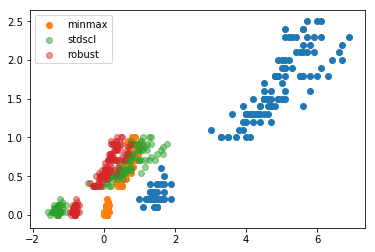

In [33]:
X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:,2],X[:,3])
plt.scatter(X_minmax[:,2],X_minmax[:,3],label='minmax')
plt.scatter(X_stdscl[:,2],X_minmax[:,3],alpha=0.5,label='stdscl')
plt.scatter(X_robust[:,2],X_minmax[:,3],alpha=0.5,label='robust')
plt.legend()
plt.show()

# ---------------------------------------------------------------------------------------------------------------

### 5) PolynomialFeatures

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [35]:
X = np.array([[1],
             [2],
             [0.5]])

In [36]:
PolynomialFeatures().fit_transform(X)

array([[1.  , 1.  , 1.  ],
       [1.  , 2.  , 4.  ],
       [1.  , 0.5 , 0.25]])

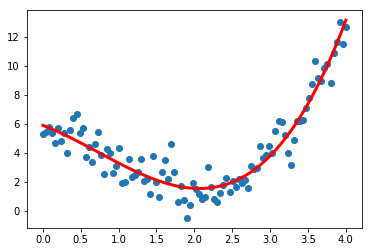

In [37]:
X = np.linspace(0,4,100).reshape((100,1))
y = X**2 + 5*np.cos(X) + np.random.randn(100,1)

plt.scatter(X,y)

X_poly = PolynomialFeatures(3).fit_transform(X)


model = LinearRegression().fit(X_poly,y)
y_pred = model.predict(X_poly)

plt.plot(X, y_pred,c='r', lw=3)

#bien sur noublie pas de normaliser vos donne apre avoir utiliser polynomial featurs

### + transformation non lineaire
### + Descritisation

# -------------------------------------------------------------------------------------------------------

### Remarque pour quoi retenire : 

In [38]:
# a retenire =>si vous debuter  labelEncoder et onehotEncoder pour les operation dencodage
#                           MinMaxscaler et StandardScayler pour les operation Normalisation
#               et polynomialFeaturs psk il peut etre sympat 

# -------------------------------------------------------------------------------------------------------

# sklearn.pypeline
### 6) Application

In [39]:
#exemple sur le dataset iris 

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [41]:
X = iris.data
y =iris.target

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=5)

In [42]:
#Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

#Estimator
model = SGDClassifier()
model.fit(X_train_transformed,y_train)

#Test
X_test_transformed =scaler.fit_transform(X_test)
model.predict(X_test_transformed)

C:\Users\user.user-PC\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

### Pipeline

In [43]:
from sklearn.pipeline import make_pipeline

In [44]:
model = make_pipeline(StandardScaler(),SGDClassifier())

model.fit(X_train,y_train)
model.predict(X_test)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

### GridserachCV

In [45]:
from sklearn.model_selection import GridSearchCV

In [56]:
model = make_pipeline(PolynomialFeatures(),StandardScaler(),SGDClassifier(random_state=0))

params={
    'polynomialfeatures__degree':[2,3,4],
    'sgdclassifier__penalty': ['l1','l2']
}

grid = GridSearchCV(model,param_grid=params,cv=4)

grid.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sgdclassifier', SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_inte...lty='l2', power_t=0.5, random_state=0, shuffle=True,
       tol=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'sgdclassifier__penalty': ['l1', 'l2'], 'polynomialfeatures__degree': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
grid.best_params_

{'polynomialfeatures__degree': 4, 'sgdclassifier__penalty': 'l1'}

In [58]:
grid.best_score_

0.975